In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime

In [55]:
df_agosto = pd.read_csv('../data/Agosto/Ana Health_Tabela Modelo Previsão Churn - Tabela até 08_23.csv', skiprows=1)
df_julho = pd.read_csv('../data/Julho/Ana Health_Tabela Modelo Previsão Churn - Tabela até 07_23.csv', skiprows=1)
df_junho = pd.read_csv('../data/Junho/Ana Health_Tabela Modelo Previsão Churn - Tabela até 06_23.csv', skiprows=1)
df_novembro = pd.read_csv('../data/Novembro/Ana Health_Tabela Modelo Previsão Churn - Tabela Geral.csv', skiprows=1)
df_outubro = pd.read_csv('../data/Outubro/Ana Health_Tabela Modelo Previsão Churn - Tabela até 10_23.csv', skiprows=1)
df_setembro = pd.read_csv('../data/Setembro/Ana Health_Tabela Modelo Previsão Churn - Tabela até 09_23.csv', skiprows=1)

In [56]:
import script_data_basico
import importlib
importlib.reload(script_data_basico)
tratamento = script_data_basico.tratamento

fim_junho = datetime(2023, 6, 30)
fim_julho = datetime(2023, 7, 31)
fim_agosto = datetime(2023, 8, 31)
fim_setembro = datetime(2023, 9, 30)
fim_outubro = datetime(2023, 10, 31)
fim_novembro = datetime(2023, 11, 30)

df_agosto = tratamento(df_agosto,fim_agosto,df_setembro)
df_julho = tratamento(df_julho, fim_julho, df_agosto)
df_junho = tratamento(df_junho, fim_junho, df_julho)
df_outubro = tratamento(df_outubro, fim_outubro, df_novembro)
df_setembro = tratamento(df_setembro, fim_setembro, df_outubro)

In [ ]:
df_total = pd.concat([df_junho, df_julho, df_agosto, df_setembro, df_outubro])

df_total['Target'] = df_total['status_prox_mes'] == 'won'

In [57]:
def prox_status(df1, df2):
    for i in range(len(df1)):
        user_id = df1['id_person'].iloc[i]
        if user_id in df2['id_person'].values:
            index = df2[df2['id_person'] == user_id].index[0]
            if df2['status'][index] == 'won':
                df1.loc[i, 'status_prox_mes'] = 'won'
            else:
                df1.loc[i, 'status_prox_mes'] = 'lost'
        else:
            df1.loc[i, 'status_prox_mes'] = None


lista_df = [df_junho, df_julho, df_agosto, df_setembro, df_outubro, df_novembro]
for i in range(len(lista_df)-1):
    prox_status(lista_df[i], lista_df[i+1])

In [58]:
df_novembro = pd.get_dummies(data=df_novembro,columns=['lost_reason'])
df_novembro

,id_person,birthdate,id_gender,id_marrital_status,id_health_plan,contract_start_date,contract_end_date,id_continuity_pf,Canal de Preferência,notes_count,...,lost_reason_[Assinatura] Não está utilizando o serviço,lost_reason_[Assinatura] Não quer seguir com a Ana,lost_reason_[Assinatura] Não se adaptou ao modelo online,lost_reason_[Assinatura] Não se adaptou com psicoterapia online,lost_reason_[Assinatura] Precisou cortar custos,lost_reason_[Assinatura] Problemas financeiros,lost_reason_[Assinatura] Quer acompanhamento de especialista focal,lost_reason_[Assinatura] Recebeu um benefício similar da empresa e não viu sentido em manter os dois,lost_reason_[Assinatura] Titular foi desligado da empresa,lost_reason_[Associade] Foi desligado da empresa e não quiz continuar
24,483,76.0,64.0,80.0,453.0,2021-01-27,2023-08-26,NaN,NaN,3,...,0,1,0,0,0,0,0,0,0,0
68,1259,31.0,64.0,82.0,NaN,2021-05-10,2022-09-09,338.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
37,972,37.0,63.0,82.0,932.0,2021-06-28,2023-09-16,339.0,NaN,2,...,0,0,0,0,0,0,0,0,0,0
38,973,37.0,64.0,80.0,412.0,2021-06-28,2022-02-07,339.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
39,974,36.0,63.0,80.0,NaN,2021-06-28,2022-08-16,NaN,NaN,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,5944,22.0,64.0,80.0,NaN,2023-11-06,NaT,NaN,239.0,0,...,0,0,0,0,0,0,0,0,0,0
1196,5948,33.0,64.0,80.0,NaN,2023-11-07,NaT,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1197,5949,26.0,64.0,80.0,NaN,2023-11-07,NaT,NaN,239.0,0,...,0,0,0,0,0,0,0,0,0,0
1199,5954,53.0,63.0,82.0,NaN,2023-11-07,NaT,NaN,239.0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

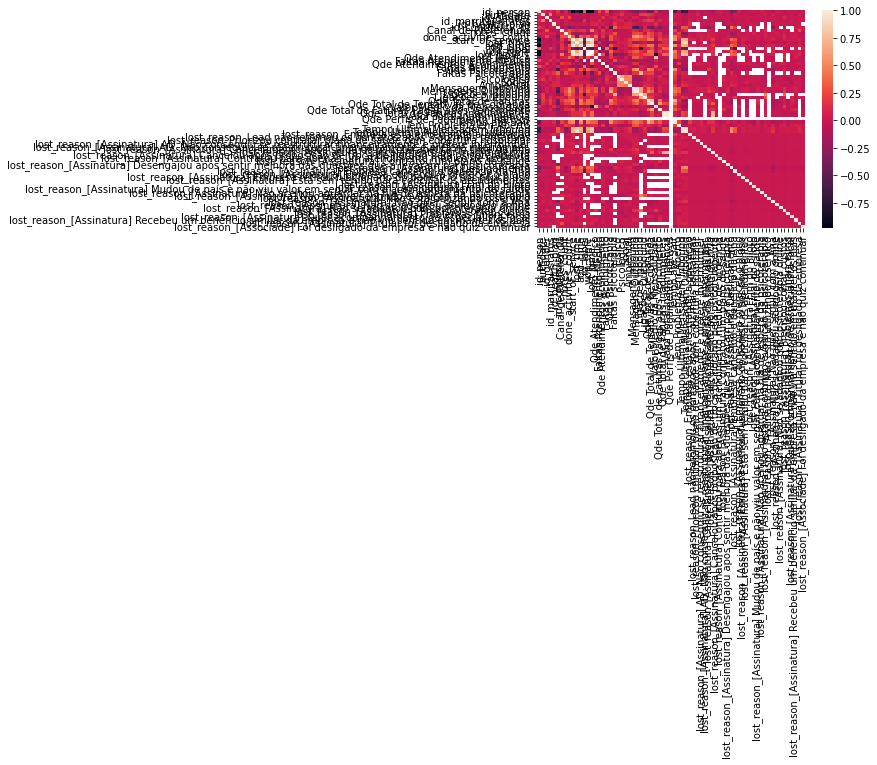

In [63]:
corr = df_novembro.corr(numeric_only=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [61]:
df_novembro['contract_end_date']

24     2023-08-26
68     2022-09-09
37     2023-09-16
38     2022-02-07
39     2022-08-16
          ...    
1195          NaT
1196          NaT
1197          NaT
1199          NaT
1200          NaT
Name: contract_end_date, Length: 1032, dtype: datetime64[ns]

In [62]:
df_novembro['Problemas Abertos']

24                                                    NaN
68      obesidade T82 (CIAP-2); pertubação do sono por...
37      alimentação inadequada em adultos T05 (CIAP-2)...
38                                                    NaN
39                                                    NaN
                              ...                        
1195                                                  NaN
1196    déficit de atenção com hiperatividade - tdah P...
1197                                                  NaN
1199                                                  NaN
1200                                                  NaN
Name: Problemas Abertos, Length: 1032, dtype: object

In [75]:
ciap = 0
cid = 0

problemas = list()
for item in df_novembro['Problemas Abertos']:
    try:
        for i in item.split(";"):
            if i[0] == ' ':
                i = i[1:len(i)]
            problemas.append(i)
            print(i)
    except:
        pass

len(np.unique(problemas))

obesidade T82 (CIAP-2)
pertubação do sono por ansiedade P06 (CIAP-2)
sensação de ansiedade/nervosismo/tensão P01 (CIAP-2)
tristeza/ sensação de depressão P03 (CIAP-2)
secura de pele S21 (CIAP-2)
obesidade extrema (imc >= 35) T82 (CIAP-2)
insônia P06 (CIAP-2)
fezes duras D12 (CIAP-2)
constipação intestinal D99 (CIAP-2)
alimentação inadequada em adultos T05 (CIAP-2)
cefaléia N01 (CIAP-2)
tendinite tibial L87 (CIAP-2)
emagrecimento T08 (CIAP-2)
dor de dente D19 (CIAP-2)
candidíase A78 (CIAP-2)
obesidade (imc >= 30) devido a um excesso calórico T82 (CIAP-2)
transtorno de ansiedade generalizado P74 (CIAP-2)
depressão P76 (CIAP-2)
sinais/sintomas da pele, outros S29 (CIAP-2)
cariótipo 46, XX, de tipo klinefelter masculino A90 (CIAP-2)
tabagismo crônico P17 (CIAP-2)
etilismo P15 (CIAP-2)
hábitos alimentares inadequados A23 (CIAP-2)
mau sono P06 (CIAP-2)
tabagismo crônico P17 (CIAP-2)
etilismo P15 (CIAP-2)
obesidade T82 (CIAP-2)
tristeza/ sensação de depressão P03 (CIAP-2)
ansiedade P01 (CIAP-

649

In [90]:
df_novembro['Tem Problema em Aberto'].value_counts()

1    546
0    486
Name: Tem Problema em Aberto, dtype: int64

In [91]:
546/(546+486)

0.5290697674418605

In [86]:
filtro_saintes = df_novembro['status'] == 'lost'

df_saintes = df_novembro[filtro_saintes]

In [85]:
df_saintes['Tem Problema em Aberto'].value_counts()

1    256
0    208
Name: Tem Problema em Aberto, dtype: int64

In [92]:
256/(256+208)

0.5517241379310345

In [88]:
filtro_ficantes = df_novembro['status'] == 'won'

df_ficantes = df_novembro[filtro_ficantes]

In [89]:
df_ficantes['Tem Problema em Aberto'].value_counts()

1    290
0    278
Name: Tem Problema em Aberto, dtype: int64

In [93]:
290/(278+290)

0.5105633802816901